In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sunao-mac/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


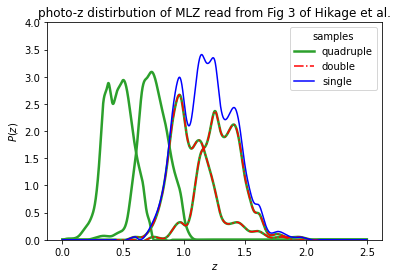

In [32]:
plt.figure()
plt.ylim(0.0, 4.0)
plt.title('photo-z distirbution of MLZ read from Fig 3 of Hikage et al.')
plt.xlabel(r'$z$')
plt.ylabel(r'$P(z)$')


for i in [1,2,3,4]:
    d = np.loadtxt(f'sourcePzs_Y1/MLZs{i}.txt')
    x = np.linspace(0.0, 2.5, 10000)
    y = ius(d[:,0], d[:,1], ext=1)(x)
    plt.plot(x,y, color='C2',alpha=1, linewidth=2.5, label=('quadruple' if i==1 else None))
    
for i in [3,4]:
    d = np.loadtxt(f'sourcePzs_Y1/MLZs{i}.txt')
    x = np.linspace(0.0, 2.5, 10000)
    y = ius(d[:,0], d[:,1], ext=1)(x)
    plt.plot(x,y, color='red',alpha=1, ls='-.', label=('double' if i==3 else None))
    
d = np.loadtxt(f'sourcePzs_Y1/MLZs34.txt')
x = np.linspace(0.0, 2.5, 10000)
y = ius(d[:,0], d[:,1], ext=1)(x)
plt.plot(x,y, color='blue',alpha=1, ls='-', label='single')

plt.legend(title='samples')
plt.savefig('figures/source_distribution.pdf')
plt.show()